In [153]:
'''
So take top 10 companies by sector instead of all 8800 thousand
(DONE)

:
(pre-processing) do on all data before 2020 Do all reproducing from lecturers after cleaning check for correlations (Bar chart all this):
            Simple linear regression (DONE)
            Multi linear regressions (DONE)
            logistic Regression (Sergei Did this so copy sergei code) (DONE)
            Missing values see if there is any missing values still (DONE)
            Outlier detection (3 std deviation) (DONE)
            Data Transformation (We already did data normalisation), 
                                    we need to do discretisation (DONE)
            Feature Enginnering we need to remove inflation adjsuted clsoign prices (already done)

When you split the data make sure you split from 2008 to 2020 is training data, then 2020 - now is training data
top 10 comapnies per sector right now
(DONE)
'''

'\nSo take top 10 companies by sector instead of all 8800 thousand\n(DONE)\n\n:\n(pre-processing) do on all data before 2020 Do all reproducing from lecturers after cleaning check for correlations (Bar chart all this):\n            Simple linear regression (DONE)\n            Multi linear regressions (DONE)\n            logistic Regression (Sergei Did this so copy sergei code) (DONE)\n            Missing values see if there is any missing values still (DONE)\n            Outlier detection (3 std deviation) (DONE)\n            Data Transformation (We already did data normalisation), \n                                    we need to do discretisation (DONE)\n            Feature Enginnering we need to remove inflation adjsuted clsoign prices (already done)\n\nWhen you split the data make sure you split from 2008 to 2020 is training data, then 2020 - now is training data\ntop 10 comapnies per sector right now\n(DONE)\n'

In [154]:
import os
import re
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf
from pandas_datareader.data import DataReader

In [155]:
# Simple Linear Regression: pure secular drift in real terms
import glob, pandas as pd, numpy as np, statsmodels.api as sm
import os

script_dir = os.getcwd()
CLEAN_DIR = os.path.join(script_dir, "output_folder")

files = glob.glob(f"{CLEAN_DIR}/*_cleaned_2008_2020.csv")


def load_clean_csv(path):
    try:
        df = pd.read_csv(path, parse_dates=["Date"]); df = df.set_index("Date")
    except ValueError:
        df = pd.read_csv(path, index_col=0, parse_dates=[0])
    df.index = pd.to_datetime(df.index).tz_localize(None)
    return df

y_col = "real_close"
results = []

for path in files:
    df = load_clean_csv(path)
    if y_col not in df.columns:
        continue
    dfi = df[[y_col]].dropna().copy()
    if dfi.empty:
        continue

    dfi["t"] = (dfi.index - dfi.index.min()).days
    X = sm.add_constant(dfi["t"])
    y = dfi[y_col].astype(float)

    res = sm.OLS(y, X).fit()
    ticker = path.split("/")[-1].replace("_cleaned.csv", "")

    results.append({
        "ticker": ticker,
        "beta_intercept": res.params.get("const", np.nan),
        "beta_slope": res.params.get("t", np.nan),
        "p_value_slope": res.pvalues.get("t", np.nan),
        "R2": res.rsquared,
        "Adj_R2": res.rsquared_adj,
        "AIC": res.aic,
        "BIC": res.bic,
        "n": int(res.nobs)
    })

pd.set_option("display.max_rows", None)

reg_table = pd.DataFrame(results).sort_values("p_value_slope")
reg_table



,ticker,beta_intercept,beta_slope,p_value_slope,R2,Adj_R2,AIC,BIC,n
1,c:\Users\supro\Desktop\VS Code\stockm\csc1171\...,127.658572,-0.016338,0.000000e+00,0.437335,0.437155,28808.144721,28820.239100,3125
3,c:\Users\supro\Desktop\VS Code\stockm\csc1171\...,16846.707488,6.719259,0.000000e+00,0.881930,0.881891,57753.119798,57765.159681,3041
6,c:\Users\supro\Desktop\VS Code\stockm\csc1171\...,1142.091284,0.589331,0.000000e+00,0.954932,0.954918,40912.717446,40924.813104,3127
4,c:\Users\supro\Desktop\VS Code\stockm\csc1171\...,11127.457530,4.846724,0.000000e+00,0.942604,0.942586,54887.110808,54899.206466,3127
7,c:\Users\supro\Desktop\VS Code\stockm\csc1171\...,811.291743,0.110415,0.000000e+00,0.687329,0.687230,38076.776346,38088.901212,3173
10,c:\Users\supro\Desktop\VS Code\stockm\csc1171\...,9010.609811,1.626847,0.000000e+00,0.819871,0.819813,52072.442203,52084.537862,3127
9,c:\Users\supro\Desktop\VS Code\stockm\csc1171\...,5112.577860,2.011539,0.000000e+00,0.881653,0.881614,50298.318234,50310.352849,3033
8,c:\Users\supro\Desktop\VS Code\stockm\csc1171\...,10797.488843,4.025848,0.000000e+00,0.812805,0.812743,56150.476832,56162.512107,3034
5,c:\Users\supro\Desktop\VS Code\stockm\csc1171\...,7265.410280,0.363414,1.525645e-235,0.290090,0.289863,50393.838605,50405.940650,3137
0,c:\Users\supro\Desktop\VS Code\stockm\csc1171\...,3492.496304,0.055530,4.382099e-10,0.012833,0.012505,47534.839977,47546.864014,3017


In [156]:
# MLR: drift net of same-day price levels/volume.

'''
How much did each stock’s price linearly trend upward or downward between 2008–2020?
'''


# CLEAN_DIR = "/home/ug/orlovsd2/csc1171/data/clean/SP500_ETF_FX_Crypto_Daily"
# files = glob.glob(f"{CLEAN_DIR}/*_cleaned_2008_2020.csv")


def load_clean_csv(path):
    try:
        df = pd.read_csv(path, parse_dates=["Date"]); df = df.set_index("Date")
    except ValueError:
        df = pd.read_csv(path, index_col=0, parse_dates=[0])
    df.index = pd.to_datetime(df.index).tz_localize(None)
    return df

y_col = "real_close"

candidate_predictors = ["volume"]


results = []

for path in files:
    df = load_clean_csv(path)
    if y_col not in df.columns:
        continue
    # build X from whatever predictors exist in this file
    preds_use = [c for c in candidate_predictors if c in df.columns and c != y_col]
    if len(preds_use) < 1:
        continue
    
    dfi = df[[y_col] + preds_use].dropna().copy()
    dfi["t"] = (dfi.index - dfi.index.min()).days
    preds_use = preds_use + ["t"]

    if dfi.empty:
        continue
    
    X = sm.add_constant(dfi[preds_use].astype(float))
    y = dfi[y_col].astype(float)
    res = sm.OLS(y, X).fit()
    coef_tbl = pd.DataFrame({
        "term": res.params.index,
        "estimate": res.params.values,
        "std_error": res.bse.values,
        "t_value": res.tvalues.values,
        "p_value": res.pvalues.values
    })



    ticker = os.path.basename(path).replace("_cleaned_2008_2020.csv", "")

    results.append({
        "ticker": ticker,
        "beta_intercept": res.params.get("const", np.nan),
        "beta_slope": res.params.get("t", np.nan),
        "p_value_slope": res.pvalues.get("t", np.nan),
        "R2": res.rsquared,
        "Adj_R2": res.rsquared_adj,
        "AIC": res.aic,
        "BIC": res.bic,
        "n": int(res.nobs)
    })

pd.set_option("display.max_rows", None)

reg_table = pd.DataFrame(results).sort_values("p_value_slope")
reg_table



,ticker,beta_intercept,beta_slope,p_value_slope,R2,Adj_R2,AIC,BIC,n
3,^BSESN,16853.187514,6.712422,0.000000e+00,0.882046,0.881969,57752.125701,57770.185526,3041
7,^N100,811.945872,0.110358,0.000000e+00,0.687331,0.687134,38078.753220,38096.940518,3173
6,^GSPC,1199.315473,0.586236,0.000000e+00,0.955244,0.955215,40893.023525,40911.167013,3127
4,^DJI,10903.927371,4.793983,0.000000e+00,0.943491,0.943455,54840.427814,54858.571302,3127
9,^NSEI,4913.177636,2.234086,0.000000e+00,0.887577,0.887503,50144.552522,50162.604444,3033
10,^NYA,10966.800323,1.521854,0.000000e+00,0.862188,0.862100,51237.075620,51255.219108,3127
8,^N225,10440.272430,4.068239,0.000000e+00,0.813079,0.812956,56148.029352,56166.082264,3034
1,CL=F,134.217818,-0.013515,5.413320e-230,0.469020,0.468680,28629.019380,28647.160949,3125
5,^FTSE,8275.975852,0.293829,3.431784e-175,0.401632,0.401250,49859.623951,49877.777018,3137
0,000001.SS,3179.697825,-0.086899,6.651329e-29,0.390803,0.390399,46080.541700,46098.577755,3017


In [ ]:
############################################### finding 3 sigma anomalies
def get_anomaly_flags(df, threshold=3.0):

    if "Return" not in df.columns:
        raise ValueError("DataFrame must contain a 'Return' column.")


    mu = df["Return"].mean()
    sigma = df["Return"].std()

    if sigma == 0 or np.isnan(sigma):
    
        anomaly_flags = pd.Series(0, index=df.index)
        return anomaly_flags, []

    z = (df["Return"] - mu) / sigma


    anomaly_flags = (z.abs() > threshold).astype(int)

    anomaly_dates = anomaly_flags[anomaly_flags == 1].index.tolist()

    return anomaly_flags, anomaly_dates


In [ ]:
##################333 anomaly summary
import os
import glob
import pandas as pd

script_dir = os.getcwd()
file_path = os.path.join(script_dir, "output_folder")
files = glob.glob(os.path.join(file_path, "*_cleaned_2020_onward.csv"))

def detect_anomalies_for_ticker(df):
    """
    Вызывает твою функцию get_anomaly_flags().
    """
    return get_anomaly_flags(df)  


summary = []

for f in files:
    ticker = os.path.basename(f).split("_cleaned")[0]

    df = pd.read_csv(f, parse_dates=["Date"]).set_index("Date")

    
    if "real_close" not in df.columns:
        print(f"WARNING: {ticker} has no real_close")
        continue

    df["Return"] = df["real_close"].pct_change().fillna(0)


    anomalies_df, anomaly_dates = detect_anomalies_for_ticker(df)

    total = len(anomaly_dates)

    if total == 0:
        summary.append({
            "ticker": ticker,
            "total_anomalies": 0,
            "avg_per_year": 0,
            "avg_per_month": 0
        })
        continue


    adf = pd.DataFrame({"Date": pd.to_datetime(anomaly_dates)})

    adf["Year"] = adf["Date"].dt.year
    adf["Month"] = adf["Date"].dt.to_period("M")

    years = adf["Year"].nunique()
    months = adf["Month"].nunique()

    summary.append({
        "ticker": ticker,
        "total_anomalies": total,
        "avg_per_year": total / years,
        "avg_per_month": total / months
    })

summary_df = pd.DataFrame(summary)
print(summary_df)



       ticker  total_anomalies  avg_per_year  avg_per_month
0   000001.SS               10      5.000000       2.000000
1        CL=F                3      3.000000       3.000000
2        GC=F               11      3.666667       1.222222
3      ^BSESN               14      4.666667       2.800000
4        ^DJI               15     15.000000       5.000000
5       ^FTSE               14      4.666667       2.333333
6       ^GSPC               14      7.000000       3.500000
7       ^N100               15      5.000000       2.142857
8       ^N225                9      4.500000       2.250000
9       ^NSEI               13      4.333333       2.600000
10       ^NYA               13      6.500000       3.250000


C:\Users\supro\AppData\Local\Temp\ipykernel_21884\1961040938.py:50: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  adf["Month"] = adf["Date"].dt.to_period("M")
C:\Users\supro\AppData\Local\Temp\ipykernel_21884\1961040938.py:50: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  adf["Month"] = adf["Date"].dt.to_period("M")
C:\Users\supro\AppData\Local\Temp\ipykernel_21884\1961040938.py:50: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  adf["Month"] = adf["Date"].dt.to_period("M")
C:\Users\supro\AppData\Local\Temp\ipykernel_21884\1961040938.py:50: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  adf["Month"] = adf["Date"].dt.to_period("M")
C:\Users\supro\AppData\Local\Temp\ipykernel_21884\1961040938.py:50: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  adf["Month

In [ ]:
########################################## Finding regression anomalies

def detect_regression_anomalies(df, threshold=3.0):
    """
    Находит регрессионные аномалии.
    df: DataFrame с колонкой 'Return' и индексом дат.
    threshold: число стандартных отклонений для определения аномалии
    Возвращает:
    - anomaly_flags: Series (1 = аномалия, 0 = нет)
    - anomaly_dates: список дат аномалий
    """
    df = df.copy()
    
    if "Return" not in df.columns:
        raise ValueError("DataFrame must contain 'Return' column")
    

    if "Return_Lag1" not in df.columns:
        df["Return_Lag1"] = df["Return"].shift(1).fillna(0)

    if "IsAnomaly" not in df.columns:
        df["IsAnomaly"] = 0
    

    X = pd.DataFrame(index=df.index)
    X["DayOfYear"] = df.index.dayofyear
    X["IsMonthStart"] = df.index.is_month_start.astype(int)
    X["IsJanuary"] = (df.index.month == 1).astype(int)
    X["Return_Lag1"] = df["Return_Lag1"]
    X["IsAnomaly"] = df["IsAnomaly"]
    
    y = df["Return"]
    

    mask = ~y.isna()
    X = X[mask]
    y = y[mask]
    
    if len(y) < 3:

        anomaly_flags = pd.Series(0, index=df.index)
        anomaly_dates = []
        return anomaly_flags, anomaly_dates
    

    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()
    

    residuals = y - model.predict(X_const)
    

    resid_std = residuals.std()
    anomaly_flags = pd.Series(0, index=df.index)
    anomaly_flags.loc[residuals.index] = (residuals.abs() > threshold * resid_std).astype(int)
    

    anomaly_dates = anomaly_flags[anomaly_flags == 1].index.tolist()
    
    return anomaly_flags, anomaly_dates

import pandas as pd
import statsmodels.api as sm
import numpy as np

df = pd.read_csv("output_folder/^BSESN_cleaned_2008_2020.csv", parse_dates=["Date"])
df = df.set_index("Date")
df["Return"] = df["real_close"].pct_change()


flags, dates = detect_regression_anomalies(df)

print("Аномалий всего:", len(dates))
# print(flags.head(10))




Аномалий всего: 46


000001.SS: found 58 anomalies


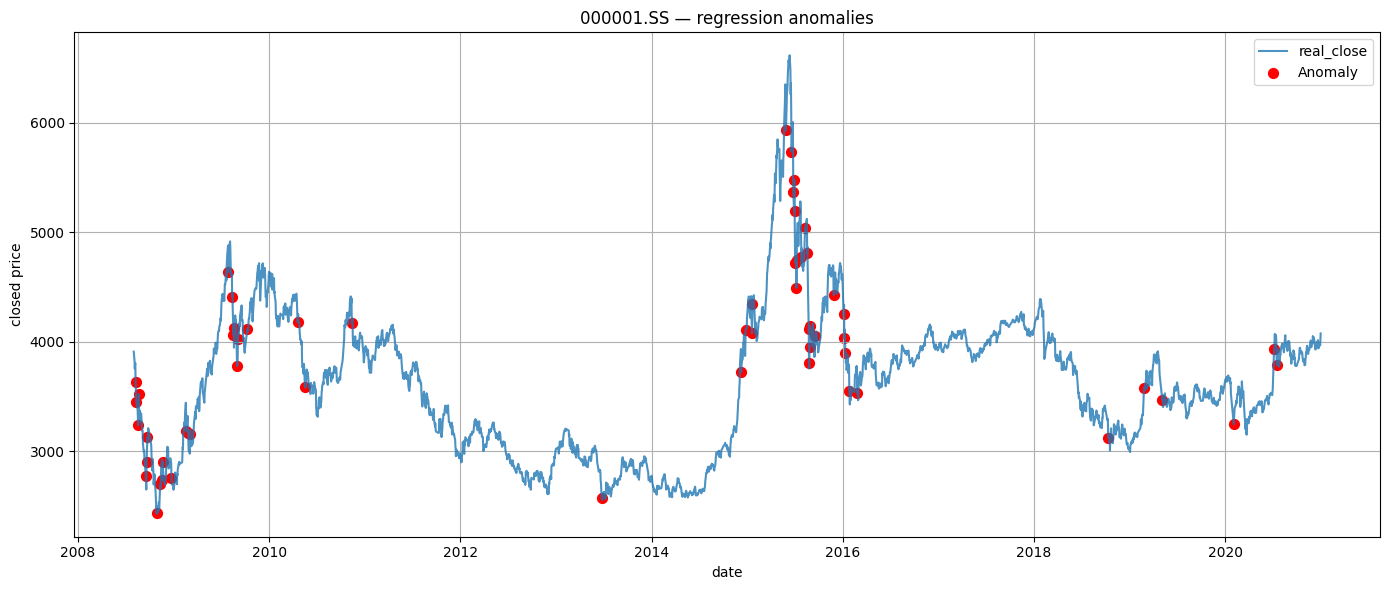

CL=F: found 12 anomalies


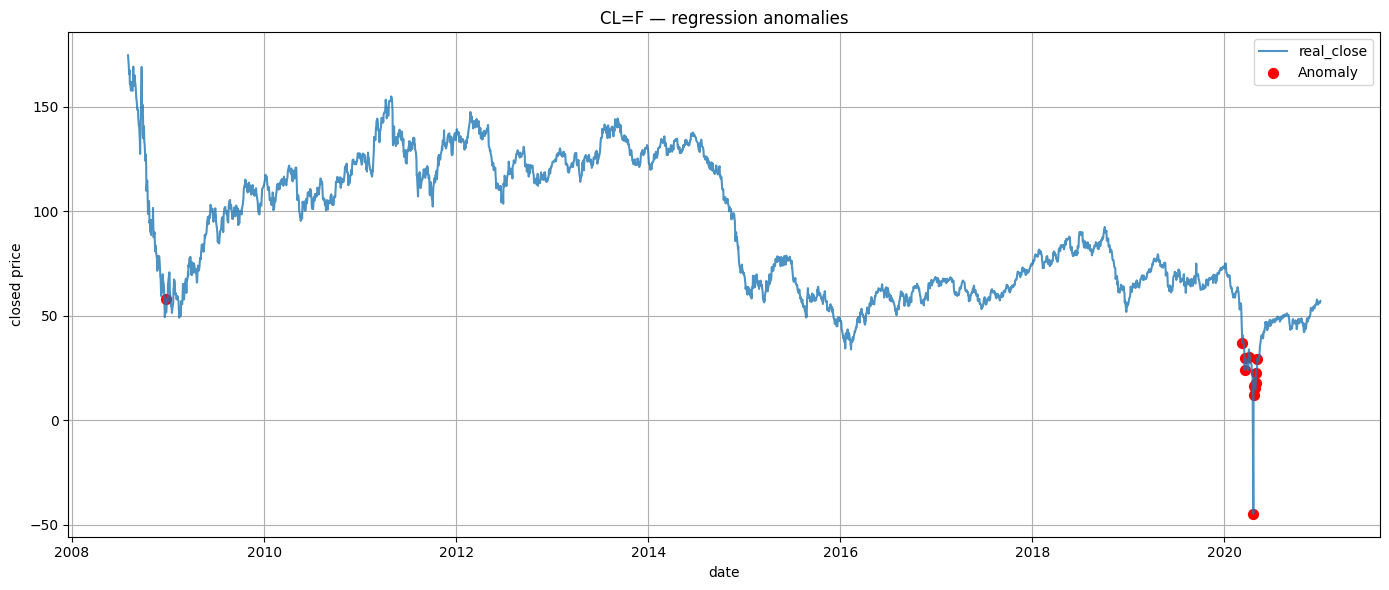

GC=F: found 50 anomalies


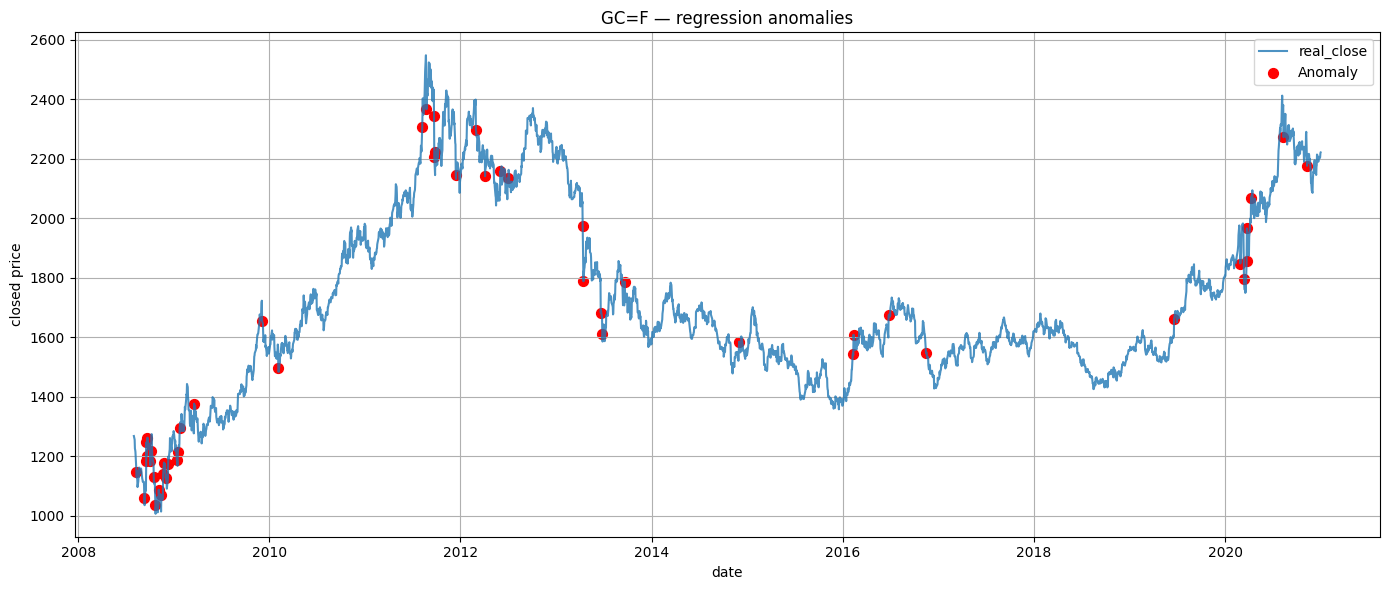

^BSESN: found 46 anomalies


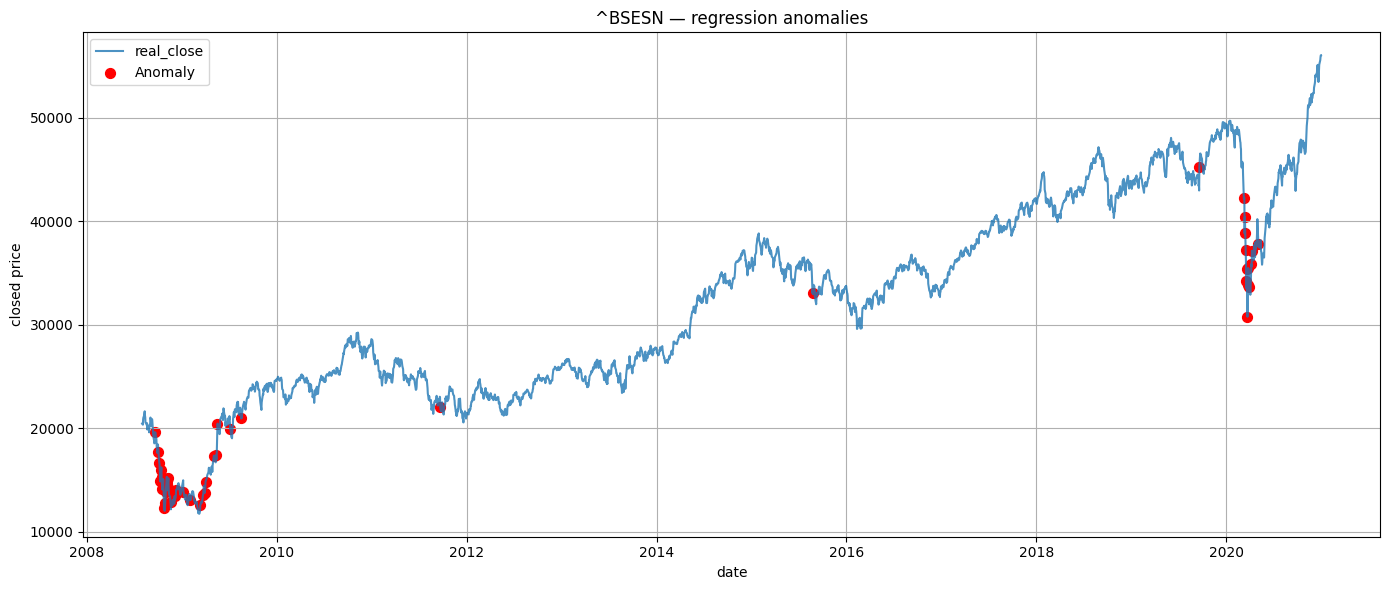

^DJI: found 56 anomalies


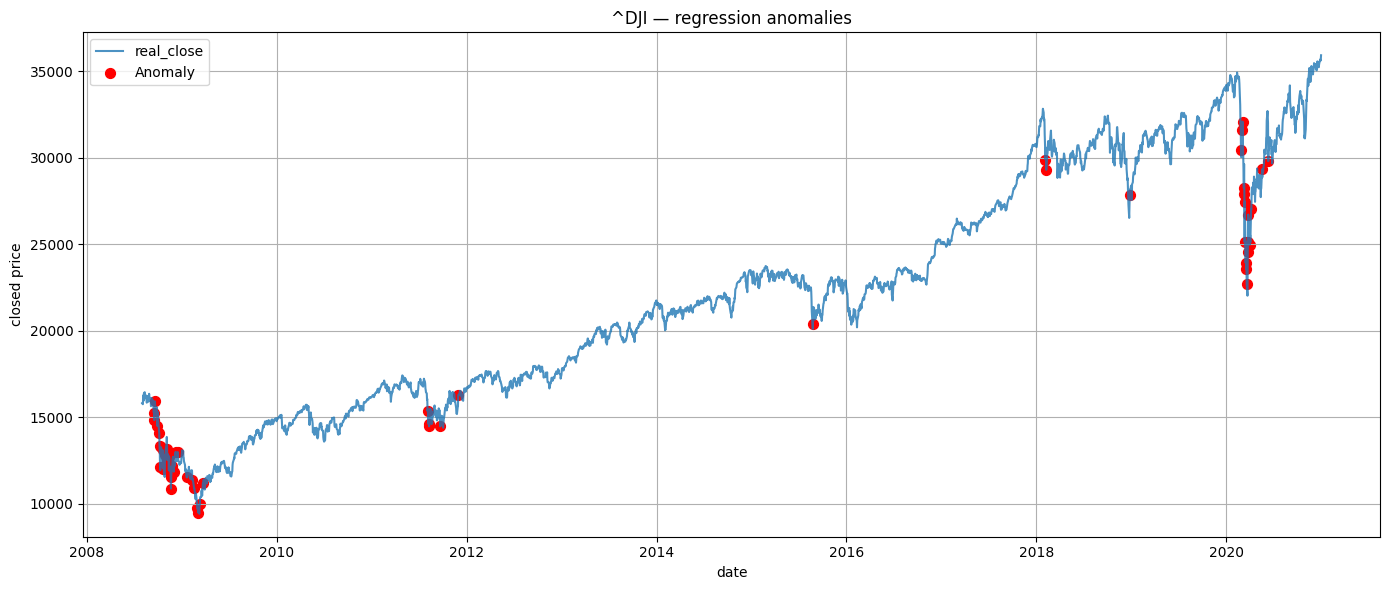

^FTSE: found 45 anomalies


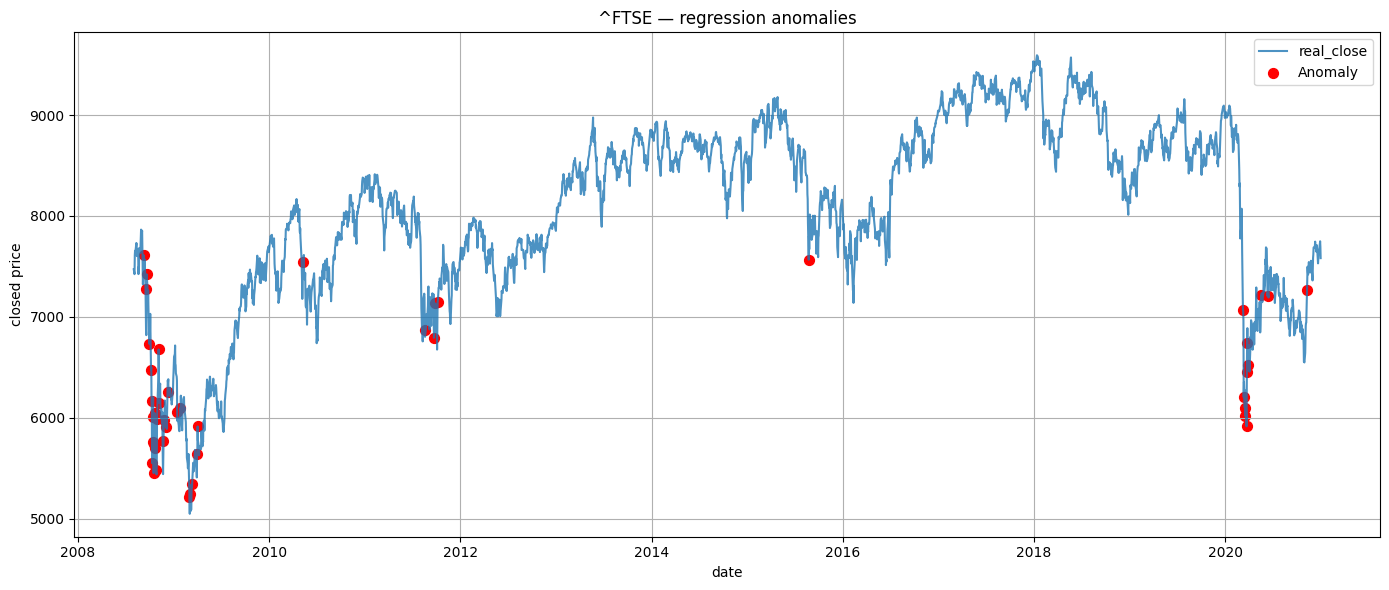

^GSPC: found 58 anomalies


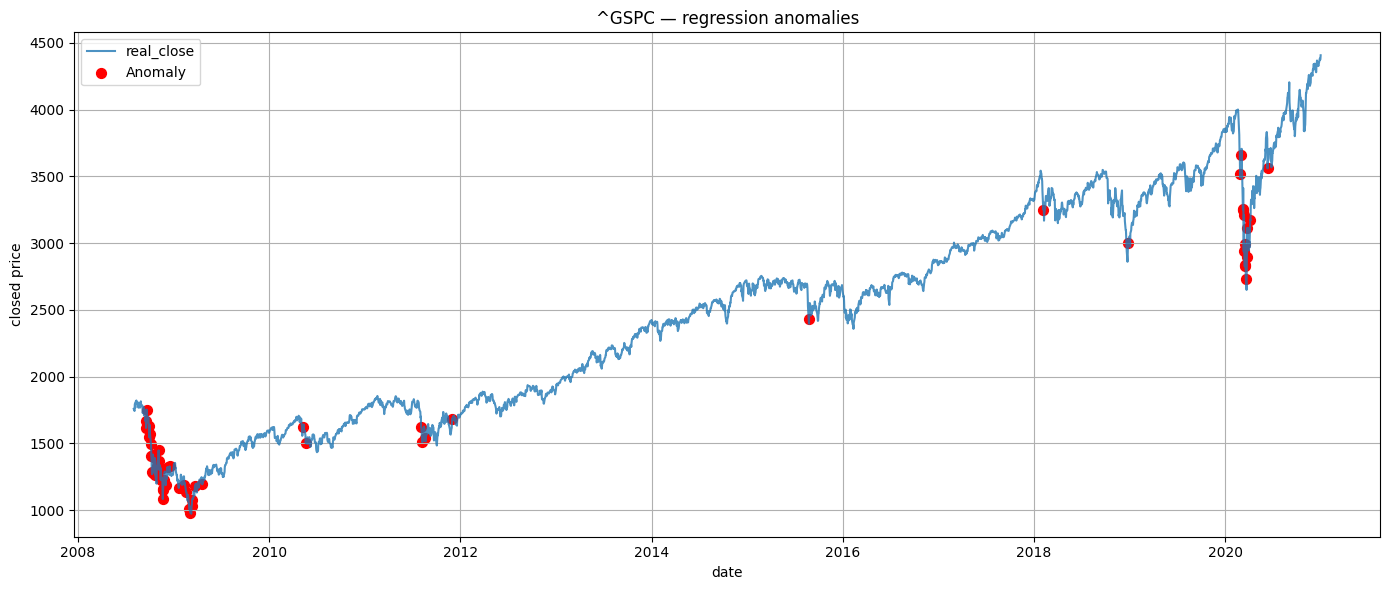

^N100: found 49 anomalies


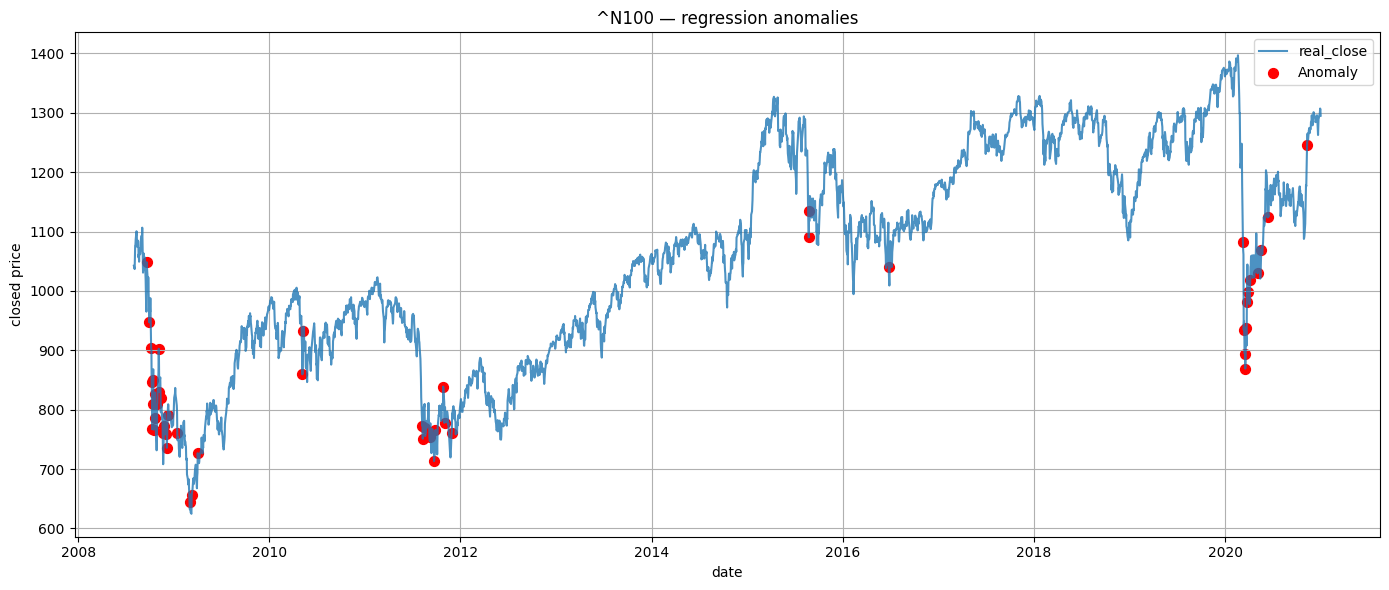

^N225: found 51 anomalies


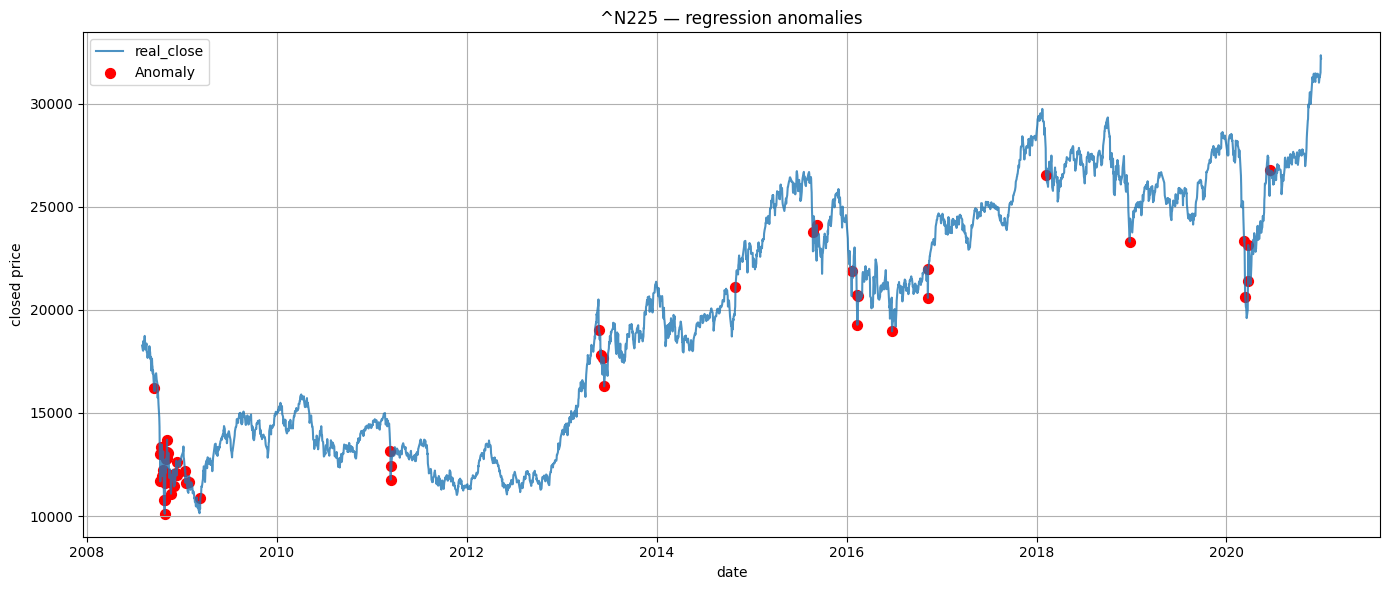

^NSEI: found 43 anomalies


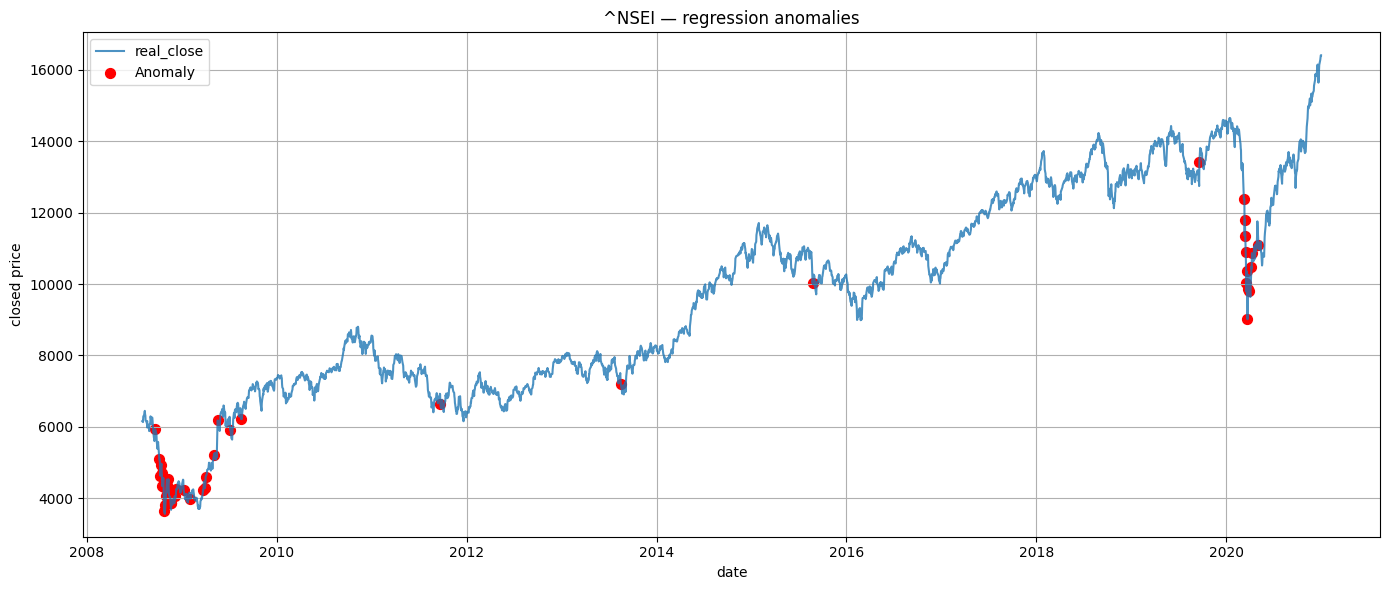

^NYA: found 61 anomalies


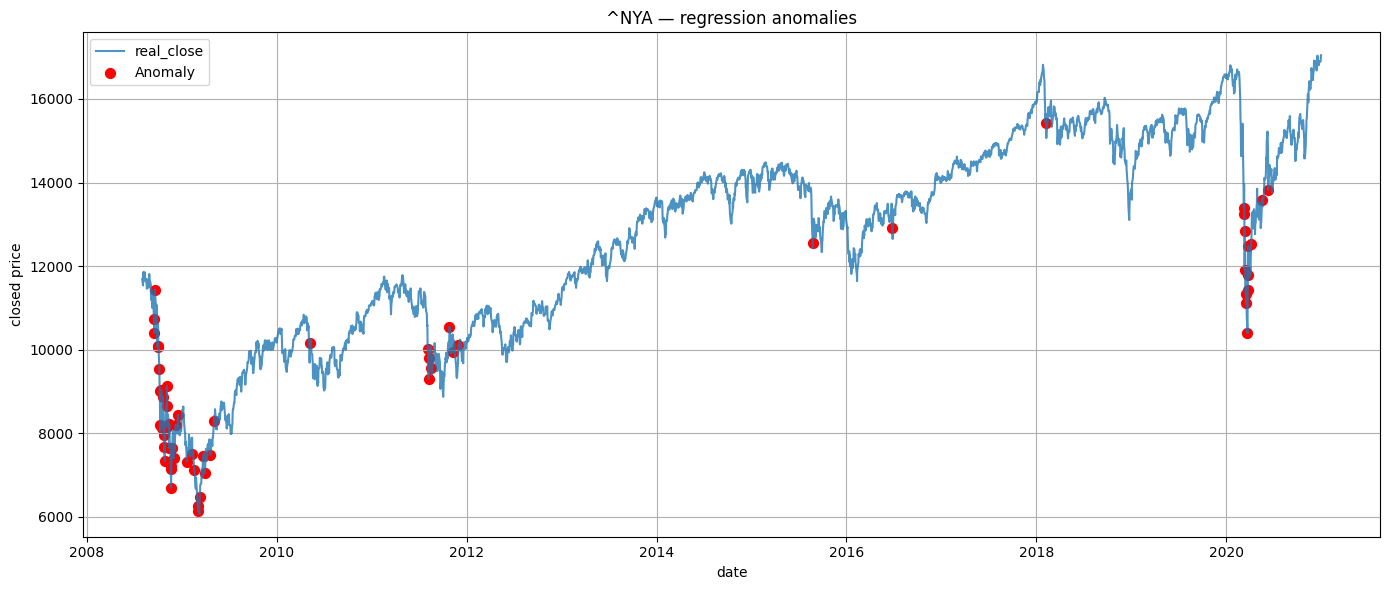

In [ ]:
###############################3 Plotting found anomalies on a graph

graph=1

import matplotlib.pyplot as plt
def plot_anomalies(df, value_col="real_close", anomaly_flags=None, title="Аномалии"):
    """
    Строит график цен с выделенными аномалиями.
    df: DataFrame с индексом дат и колонкой value_col
    anomaly_flags: Series с 0/1 флагами аномалий
    """
    plt.figure(figsize=(14,6))
    plt.plot(df.index, df[value_col], label=value_col, alpha=0.8)

    if anomaly_flags is not None:
        plt.scatter(
            df.index[anomaly_flags==1],
            df[value_col][anomaly_flags==1],
            color="red",
            s=50,
            label="Anomaly"
        )

    plt.title(title)
    plt.xlabel("date")
    plt.ylabel("closed price")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

import os, glob
import pandas as pd


if graph==1:
    for f in files:
        ticker = os.path.basename(f).split("_cleaned")[0]


        df = pd.read_csv(f, parse_dates=["Date"])
        df = df.set_index("Date")
        
        if "real_close" not in df.columns:
            continue

        df["Return"] = df["real_close"].pct_change().fillna(0)


        flags, dates = detect_regression_anomalies(df)

        print(f"{ticker}: found {len(dates)} anomalies")


        plot_anomalies(df, value_col="real_close", anomaly_flags=flags, title=f"{ticker} — regression anomalies")


In [ ]:
# logistic Regression
import os
import glob
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tools.sm_exceptions import PerfectSeparationError


def load_clean_csv(path):
    """Загрузка CSV с датой в качестве индекса."""
    try:
        df = pd.read_csv(path, parse_dates=["Date"]).set_index("Date")
    except ValueError:
        df = pd.read_csv(path, index_col=0, parse_dates=[0])
    df.index = pd.to_datetime(df.index).tz_localize(None)
    return df

def make_calendar_features(df):
    """Создание календарных признаков и лага предыдущего дня."""
    idx = df.index
    out = pd.DataFrame(index=idx)
    out["DayOfYear"] = idx.dayofyear.astype(int)
    out["IsMonthStart"] = idx.is_month_start.astype(int)
    out["IsJanuary"] = (idx.month == 1).astype(int)
    df["Return_Lag1"] = df["Return"].shift(1)  
    return out

def safe_pct_change(s):
    """Вычисляет дневную доходность, игнорируя inf."""
    r = s.pct_change()
    return r.replace([np.inf, -np.inf], np.nan)

CLEAN_DIR = "./output_folder" 
files = glob.glob(os.path.join(CLEAN_DIR, "*_cleaned_2008_2020.csv"))

results = []
logit_models = {} 


for path in files:
    df = load_clean_csv(path)
    if "real_close" not in df.columns:
        continue


    df["Return"] = safe_pct_change(df["real_close"])
    feats = make_calendar_features(df)


    X_logit = feats[["DayOfYear", "IsMonthStart", "IsJanuary"]].copy()
    X_logit["Return_Lag1"] = df["Return_Lag1"]
    y = (df["Return"] > 0).astype(int)


    dfi = pd.concat([X_logit, y.rename("Return_Positive")], axis=1).dropna()
    if dfi.empty or dfi["Return_Positive"].nunique() < 2:
        continue


    X = sm.add_constant(dfi[["DayOfYear", "IsMonthStart", "IsJanuary"]])
    X["Return_Lag1"] = dfi["Return_Lag1"]
    yb = dfi["Return_Positive"]

    try:
       
        logit_model = sm.Logit(yb, X).fit(disp=False)
        ticker = os.path.basename(path).replace("_cleaned_2020_onward.csv", "")
        logit_models[ticker] = logit_model 

      
        phat = logit_model.predict(X)
        pred = (phat >= 0.5).astype(int)
        acc = (pred == yb).mean()

        params = logit_model.params
        pvals = logit_model.pvalues

        results.append({
            "ticker": ticker,
            "coef_const": params.get("const", np.nan),
            "coef_DayOfYear": params.get("DayOfYear", np.nan),
            "coef_IsMonthStart": params.get("IsMonthStart", np.nan),
            "coef_IsJanuary": params.get("IsJanuary", np.nan),
            "coef_Lag1": params.get("Return_Lag1", np.nan),
            "p_const": pvals.get("const", np.nan),
            "p_DayOfYear": pvals.get("DayOfYear", np.nan),
            "p_IsMonthStart": pvals.get("IsMonthStart", np.nan),
            "p_IsJanuary": pvals.get("IsJanuary", np.nan),
            "p_Lag1": pvals.get("Return_Lag1", np.nan),


            "pseudoR2_McFadden": logit_model.prsquared,
            "AIC": logit_model.aic,
            "BIC": logit_model.bic,
            "n": int(logit_model.nobs),
            "accuracy@0.5": float(acc)
            
        })

    except PerfectSeparationError:
        print(f"SKIP {ticker}: PerfectSeparationError")
        continue
    except Exception as e:
        print(f"SKIP {ticker}: {type(e).__name__}: {e}")
        continue


pd.set_option("display.max_rows", None)
logit_table = pd.DataFrame(results)
if not logit_table.empty:
    logit_table = logit_table.sort_values("p_DayOfYear")

print(logit_table)


                             ticker  coef_const  coef_DayOfYear  coef_IsMonthStart  coef_IsJanuary  coef_Lag1   p_const  p_DayOfYear  p_IsMonthStart  p_IsJanuary    p_Lag1  pseudoR2_McFadden  \
7       ^N100_cleaned_2008_2020.csv    0.237514       -0.000605           0.206876       -0.243329   1.484769  0.006285     0.117994        0.351273     0.102584  0.576251           0.001090   
0   000001.SS_cleaned_2008_2020.csv    0.219632       -0.000597           0.429930       -0.043964  -0.916794  0.014112     0.130690        0.074585     0.779303  0.709478           0.001451   
8       ^N225_cleaned_2008_2020.csv   -0.006162        0.000526           0.105677        0.011699  -4.307958  0.944236     0.180918        0.618436     0.940127  0.070647           0.001323   
10       ^NYA_cleaned_2008_2020.csv    0.059129        0.000392          -0.173162        0.140899  -6.620996  0.497884     0.312960        0.409794     0.355970  0.012954           0.001921   
4        ^DJI_cleaned_2008_202

In [162]:
########################## shows coefficients
for ticker, model in logit_models.items():
    print(f"Ticker: {ticker}")
    print("Coefficients:")
    print(model.params)
    print("P-values:")
    print(model.pvalues)
    print("-" * 40)


Ticker: 000001.SS_cleaned_2008_2020.csv
Coefficients:
const           0.219632
DayOfYear      -0.000597
IsMonthStart    0.429930
IsJanuary      -0.043964
Return_Lag1    -0.916794
dtype: float64
P-values:
const           0.014112
DayOfYear       0.130690
IsMonthStart    0.074585
IsJanuary       0.779303
Return_Lag1     0.709478
dtype: float64
----------------------------------------
Ticker: CL=F_cleaned_2008_2020.csv
Coefficients:
const           0.131005
DayOfYear      -0.000363
IsMonthStart   -0.452099
IsJanuary      -0.199087
Return_Lag1     0.007103
dtype: float64
P-values:
const           0.132806
DayOfYear       0.348475
IsMonthStart    0.034420
IsJanuary       0.190346
Return_Lag1     0.989578
dtype: float64
----------------------------------------
Ticker: GC=F_cleaned_2008_2020.csv
Coefficients:
const           0.099828
DayOfYear      -0.000161
IsMonthStart   -0.379632
IsJanuary       0.165825
Return_Lag1    -9.114887
dtype: float64
P-values:
const           0.252483
DayOfYear  

In [ ]:
############### change ticker names

import pandas as pd




logit_table["ticker"] = logit_table["ticker"].str.replace(r"_cleaned_2008_2020\.csv$", "", regex=True)



In [ ]:
###################### This predicts whether next day would be positive or negative based on a date and a previous day's data.
######################## It also calculates probabilities of success and their errors (of probabilities)
############################# Upper and lower bound is where we would get with 95% certainty
import os, glob
import pandas as pd
import numpy as np


script_dir = os.getcwd()
file_path = os.path.join(script_dir, "output_folder")
files = glob.glob(os.path.join(file_path, "*_cleaned_2020_onward.csv"))

results_pred = []

for f in files:
    file_name = os.path.basename(f)
   
    file_prefix = file_name.split("_cleaned_2020_onward")[0]


    matched_rows = logit_table[logit_table["ticker"] == file_prefix]


    if matched_rows.empty:
        print(f"Нет модели для {file_name}, пропускаем")
        continue

    params = matched_rows.iloc[0] 
    ticker = params["ticker"]      

 
    df = pd.read_csv(f, parse_dates=["Date"]).set_index("Date")
    df.index = pd.to_datetime(df.index).tz_localize(None)

    if "real_close" not in df.columns:
        continue


    df["Return"] = df["real_close"].pct_change()
    df["Return_prev"] = df["Return"].shift(1).fillna(0)


    if "IsAnomaly" not in df.columns:
        df["IsAnomaly"] = 0
    if "IsAnomaly_Regression" not in df.columns:
        df["IsAnomaly_Regression"] = 0


    X = pd.DataFrame(index=df.index)
    X["const"] = 1
    X["DayOfYear"] = df.index.dayofyear
    X["IsMonthStart"] = df.index.is_month_start.astype(int)
    X["IsJanuary"] = (df.index.month == 1).astype(int)
    X["Return_prev"] = df["Return_prev"]


    X["IsAnomaly"] = df["IsAnomaly"]
    X["IsAnomaly_Regression"] = df["IsAnomaly_Regression"]


    coefs = pd.Series({
        "const":        params["coef_const"],
        "DayOfYear":    params["coef_DayOfYear"],
        "IsMonthStart": params["coef_IsMonthStart"],
        "IsJanuary":    params["coef_IsJanuary"],
        "Return_prev":  params.get("coef_Lag1", 0),
        "IsAnomaly":    params.get("coef_IsAnomaly", 0),
        "IsAnomaly_Regression": params.get("coef_IsAnomaly_Regression", 0)
    })


    linear_comb = X.dot(coefs)
    prob = 1 / (1 + np.exp(-linear_comb))
    pred = (prob >= 0.5).astype(int)


    actual_up = (df["Return"] > 0).astype(int)

    df_pred = pd.DataFrame({
        "previous_close": df["real_close"].shift(1),
        "actual_up": actual_up,
        "predicted_up": pred,
        "prob_up": prob
    })

    results_pred.append((ticker, df_pred))


n_boot = 1000
results_accuracy = []

for ticker, df_pred in results_pred:
    actual = df_pred["actual_up"]
    pred = df_pred["predicted_up"]

    acc = (pred == actual).mean() 


    boot_means = []
    for _ in range(n_boot):
        idx = np.random.choice(df_pred.index, size=len(df_pred), replace=True)
        sample_acc = (pred.loc[idx] == actual.loc[idx]).mean()
        boot_means.append(sample_acc)

    boot_means = np.array(boot_means)
    ci_lower = np.percentile(boot_means, 2.5)
    ci_upper = np.percentile(boot_means, 97.5)

    results_accuracy.append({
        "ticker": ticker, 
        "accuracy": acc,
        "ci_lower": ci_lower,
        "ci_upper": ci_upper
    })

accuracy_table = pd.DataFrame(results_accuracy).sort_values("accuracy", ascending=False)
print(accuracy_table)



       ticker  accuracy  ci_lower  ci_upper
9       ^NSEI  0.542889  0.511287  0.575621
2        GC=F  0.537264  0.505006  0.570634
7       ^N100  0.535365  0.504897  0.564744
6       ^GSPC  0.533927  0.499444  0.567297
3      ^BSESN  0.532805  0.501103  0.565611
5       ^FTSE  0.532222  0.500000  0.562222
1        CL=F  0.529477  0.498304  0.561735
4        ^DJI  0.529477  0.497191  0.562848
10       ^NYA  0.528365  0.497219  0.562875
8       ^N225  0.520642  0.488532  0.555046
0   000001.SS  0.503464  0.471103  0.535797


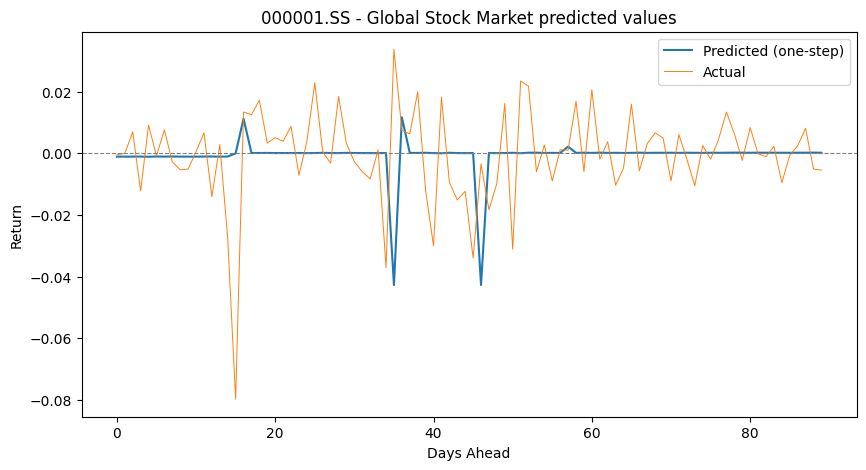

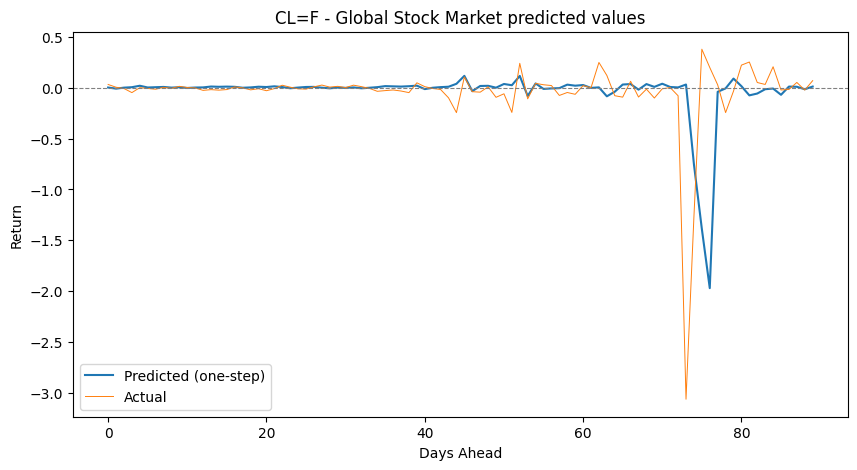

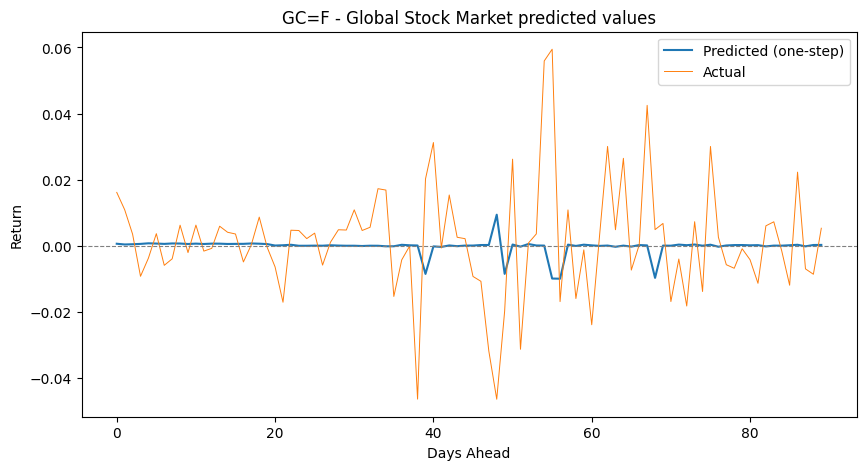

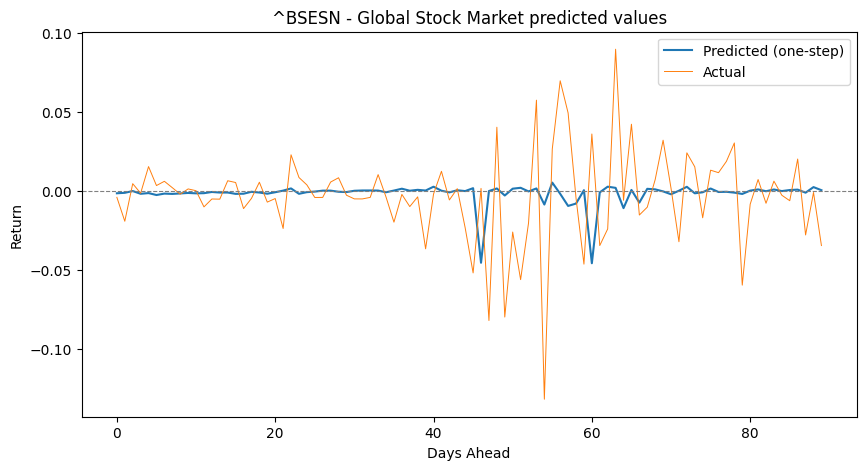

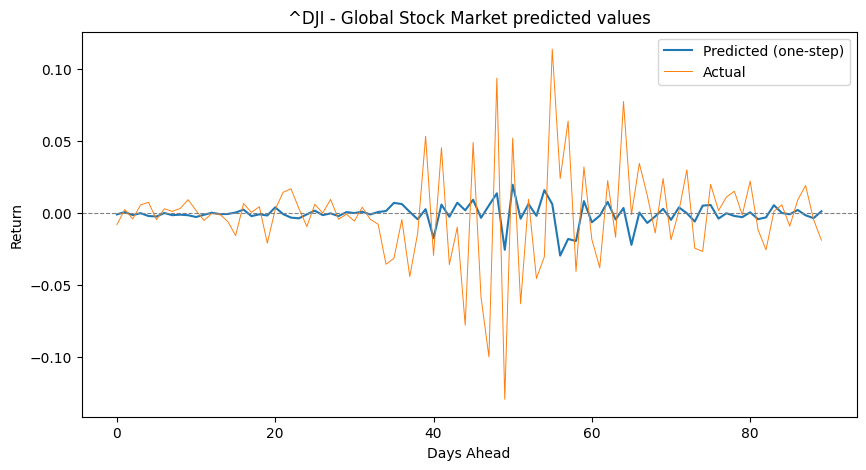

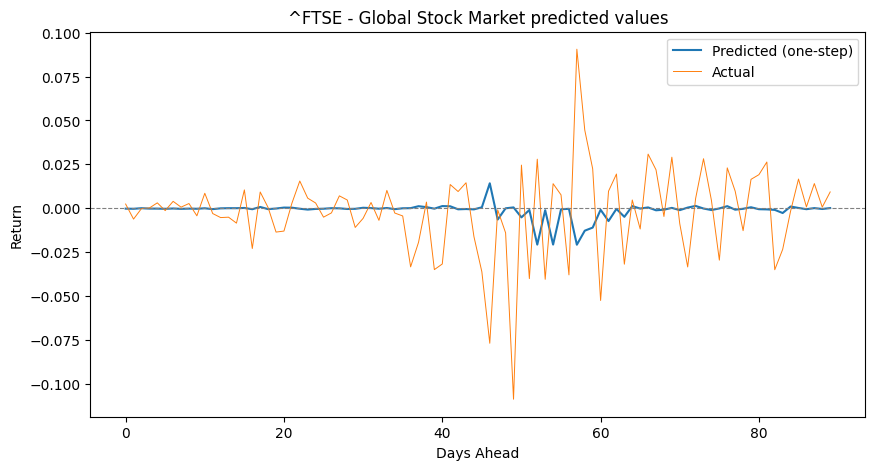

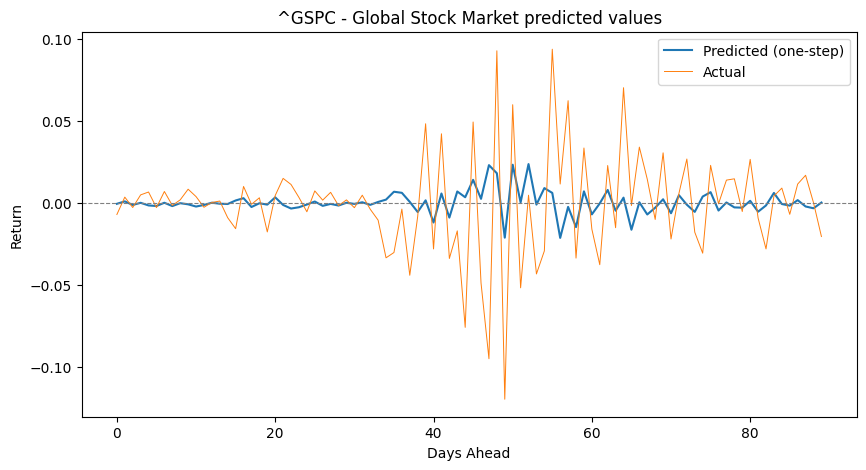

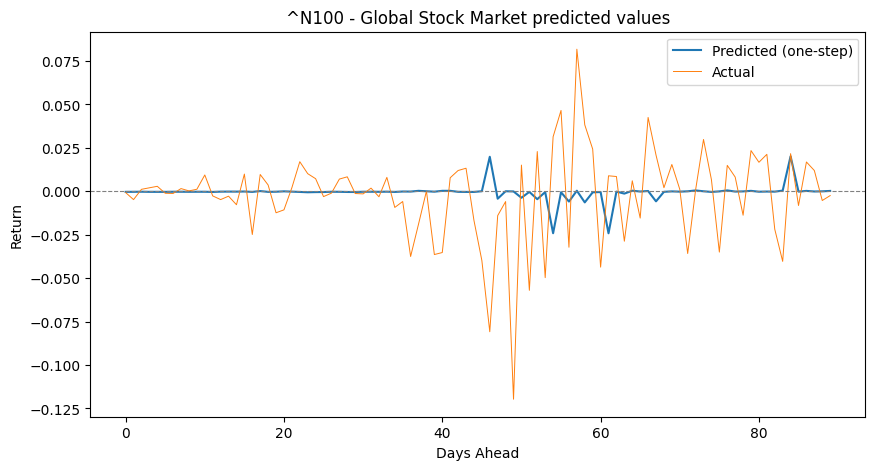

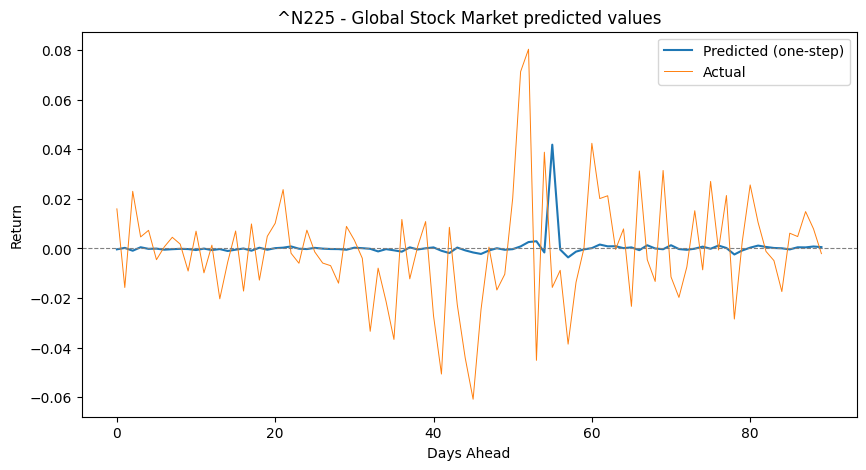

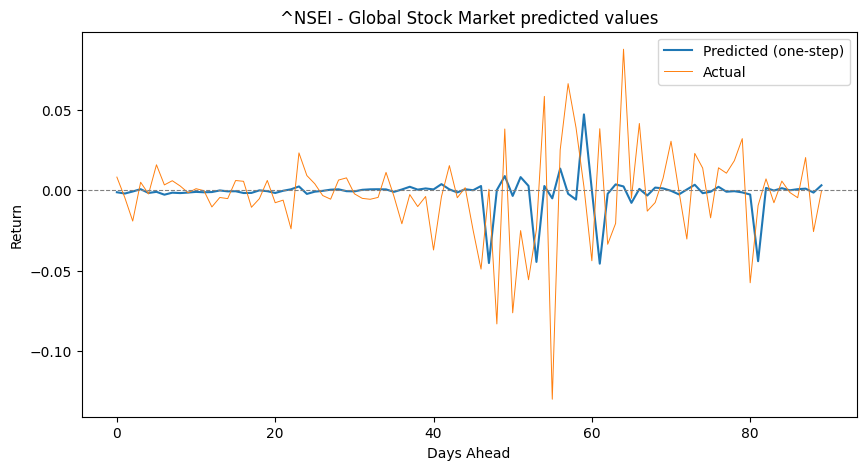

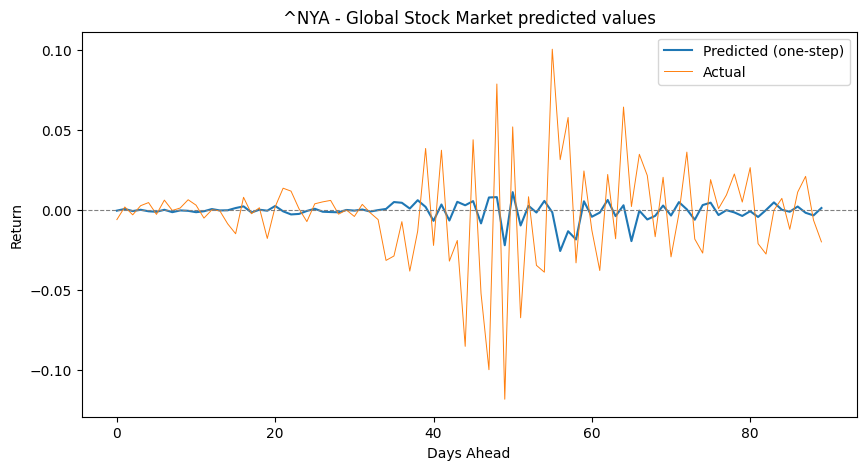

=== One-step Forecast Metrics including Sign Match ===
       ticker  MAE_one_step  mean_real_abs  sign_match_%
0   000001.SS      0.007821       0.007583     50.173410
1        CL=F      0.032343       0.027947     50.668151
2        GC=F      0.007693       0.007635     52.783964
3      ^BSESN      0.008906       0.008774     52.208381
4        ^DJI      0.009350       0.009279     52.449889
5       ^FTSE      0.008244       0.008043     52.614016
6       ^GSPC      0.010095       0.009986     54.120267
7       ^N100      0.009109       0.008976     53.159041
8       ^N225      0.009722       0.009654     50.172216
9       ^NSEI      0.008883       0.008667     51.638418
10       ^NYA      0.009573       0.009438     49.665924

=== Regression Coefficients for all tickers ===
       ticker  coef_const   p_const  coef_DayOfYear  p_DayOfYear  coef_IsMonthStart  p_IsMonthStart  coef_IsJanuary  p_IsJanuary  coef_Return_Lag1  p_Return_Lag1  coef_IsAnomaly   p_IsAnomaly  \
0   000001.SS   -

In [ ]:
########################This tries to linearly predict it 30 days into the future(day by day using last day's data) and how it would look like

import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


script_dir = os.getcwd()
file_path = os.path.join(script_dir, "output_folder")
files = glob.glob(os.path.join(file_path, "*_cleaned_2020_onward.csv"))
#Graph it? yes=1
forecast_days = 90  
graph = 1           


results_one_step = []
all_coefs = []


for f in files:
    ticker = os.path.basename(f).split("_cleaned")[0]

    df = pd.read_csv(f, parse_dates=["Date"]).set_index("Date")
    df.index = pd.to_datetime(df.index).tz_localize(None)

    if "real_close" not in df.columns:
        continue


    df["Return"] = df["real_close"].pct_change().fillna(0)
    df["Return_Lag1"] = df["Return"].shift(1).fillna(0)


    df["IsAnomaly"], _ = get_anomaly_flags(df, threshold=3.0)
    df["IsAnomaly_Regression"], _ = detect_regression_anomalies(df)


    X = pd.DataFrame(index=df.index)
    X["DayOfYear"] = df.index.dayofyear
    X["IsMonthStart"] = df.index.is_month_start.astype(int)
    X["IsJanuary"] = (df.index.month == 1).astype(int)
    X["Return_Lag1"] = df["Return_Lag1"]
    X["IsAnomaly"] = df["IsAnomaly"]
    X["IsAnomaly_Regression"] = df["IsAnomaly_Regression"]


    y = df["Return"]

   
    X_const = sm.add_constant(X)

    model = sm.OLS(y, X_const).fit()

  
    coef_row = {
    "ticker": ticker,

  
    "coef_const": model.params.get("const", np.nan),
    "p_const": model.pvalues.get("const", np.nan),
    

 
    "coef_DayOfYear": model.params.get("DayOfYear", np.nan),
    "p_DayOfYear": model.pvalues.get("DayOfYear", np.nan),
    

    "coef_IsMonthStart": model.params.get("IsMonthStart", np.nan),
    "p_IsMonthStart": model.pvalues.get("IsMonthStart", np.nan),
    

   
    "coef_IsJanuary": model.params.get("IsJanuary", np.nan),
    "p_IsJanuary": model.pvalues.get("IsJanuary", np.nan),
    

    "coef_Return_Lag1": model.params.get("Return_Lag1", np.nan),
    "p_Return_Lag1": model.pvalues.get("Return_Lag1", np.nan),
    

  
    "coef_IsAnomaly": model.params.get("IsAnomaly", np.nan),
    "p_IsAnomaly": model.pvalues.get("IsAnomaly", np.nan),
    

  
    "coef_IsAnomaly_Regression": model.params.get("IsAnomaly_Regression", np.nan),
    "p_IsAnomaly_Regression": model.pvalues.get("IsAnomaly_Regression", np.nan),
    
    }

    all_coefs.append(coef_row)



    pred_one_step = []
    actual_one_step = []

    for i in range(1, len(df)):
        X_next = pd.Series({
            "const": 1,
            "DayOfYear": df.index[i].dayofyear,
            "IsMonthStart": int(df.index[i].is_month_start),
            "IsJanuary": int(df.index[i].month==1),
            "Return_Lag1": df["Return"].iloc[i-1],
            "IsAnomaly": df["IsAnomaly"].iloc[i-1],
            "IsAnomaly_Regression": df["IsAnomaly_Regression"].iloc[i-1]
        })
        pred = X_next.dot(model.params)
        pred_one_step.append(pred)
        actual_one_step.append(df["Return"].iloc[i])

    pred_one_step = np.array(pred_one_step)
    actual_one_step = np.array(actual_one_step)

  
    if len(pred_one_step) > 0:
        sign_match_pct = 100 * (np.sign(pred_one_step) == np.sign(actual_one_step)).sum() / len(pred_one_step)
    else:
        sign_match_pct = np.nan


    if graph==1:
       
        plot_len = min(forecast_days, len(pred_one_step))
        plt.figure(figsize=(10,5))
        plt.plot(range(plot_len), pred_one_step[:plot_len], label="Predicted (one-step)")
        plt.plot(range(plot_len), actual_one_step[:plot_len], label="Actual", linewidth=0.7)
        plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
        plt.title(f"{ticker} - Global Stock Market predicted values")
        plt.xlabel("Days Ahead")
        plt.ylabel("Return")
        plt.legend()
        plt.show()



    results_one_step.append({
        "ticker": ticker,
        "MAE_one_step": np.mean(np.abs(pred_one_step - actual_one_step)),
        "mean_real_abs": np.mean(np.abs(actual_one_step)),
        "sign_match_%": sign_match_pct
    })


one_step_table = pd.DataFrame(results_one_step)
print("=== One-step Forecast Metrics including Sign Match ===")
print(one_step_table)

last_index = df.index[-1]
prev_return = df["Return"].iloc[-1]
pred_recursive = []





coef_table = pd.DataFrame(all_coefs)
cols = ["ticker"] + [c for c in coef_table.columns if c != "ticker"]
coef_table = coef_table[cols]

print("\n=== Regression Coefficients for all tickers ===")
print(coef_table)




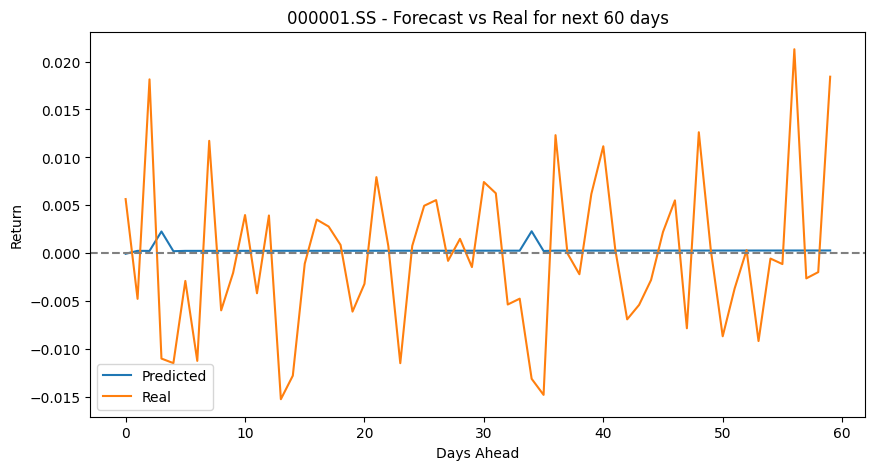

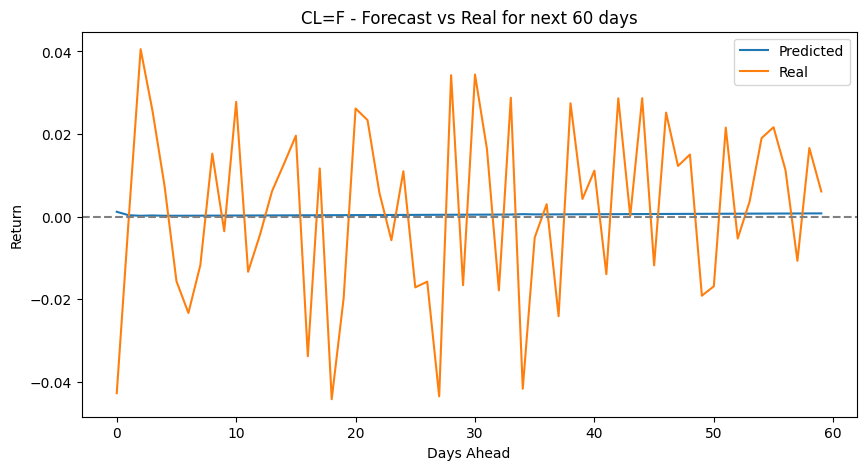

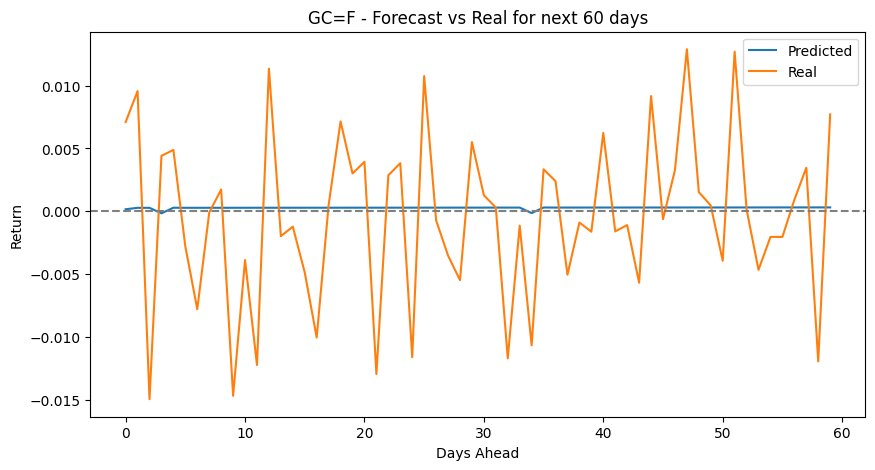

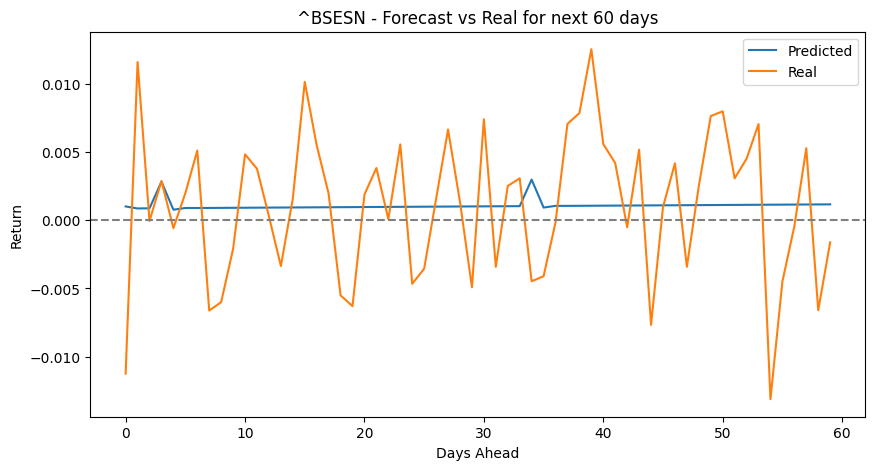

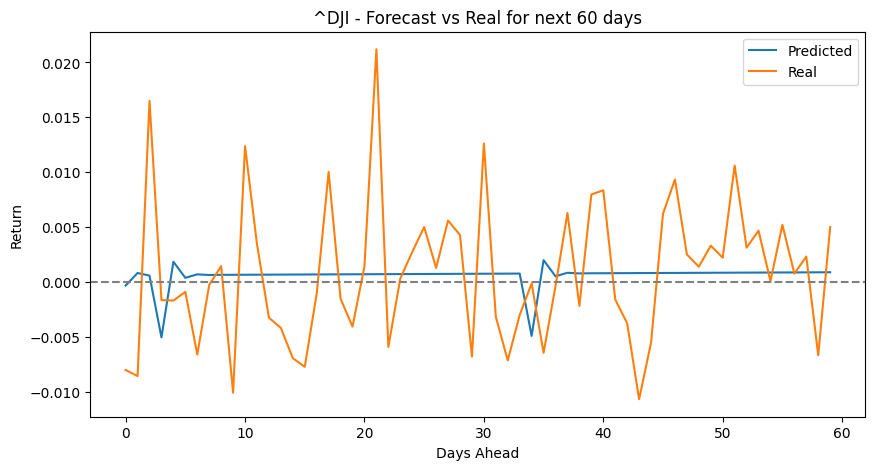

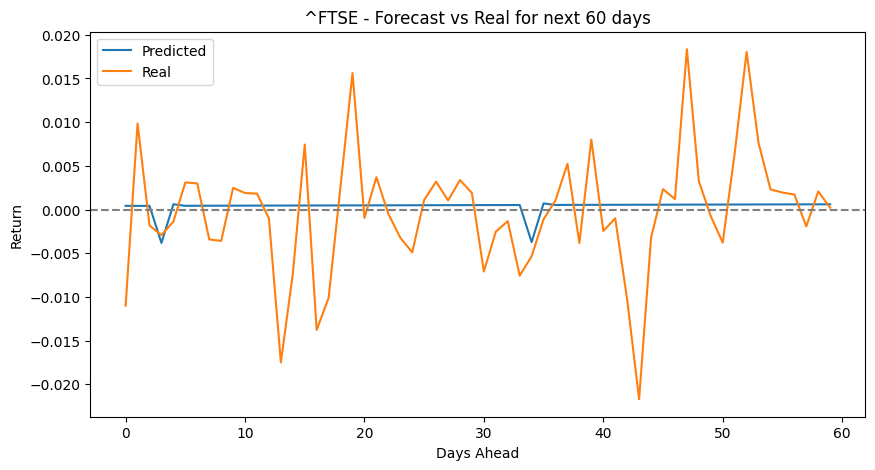

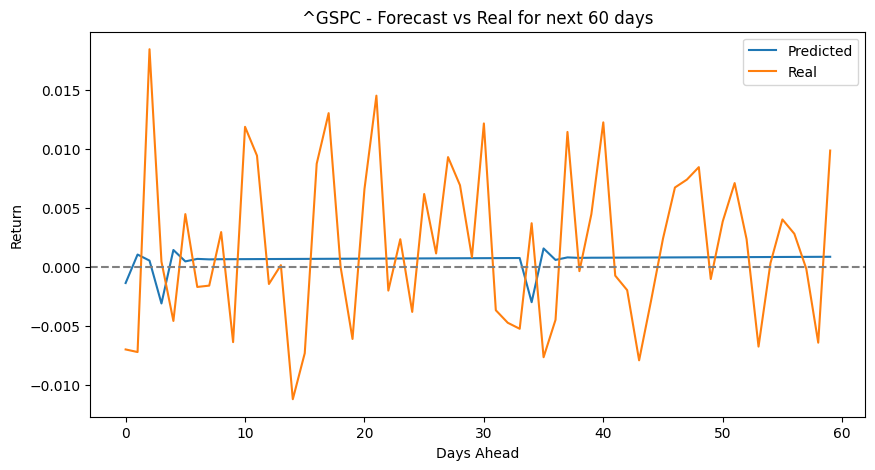

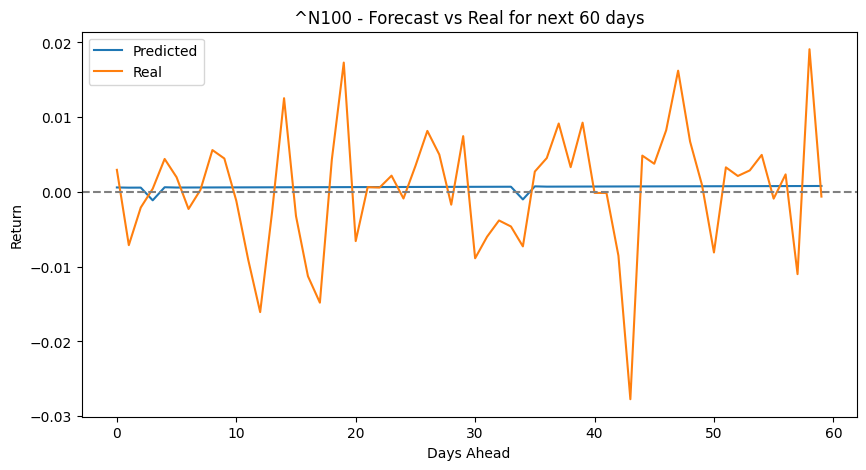

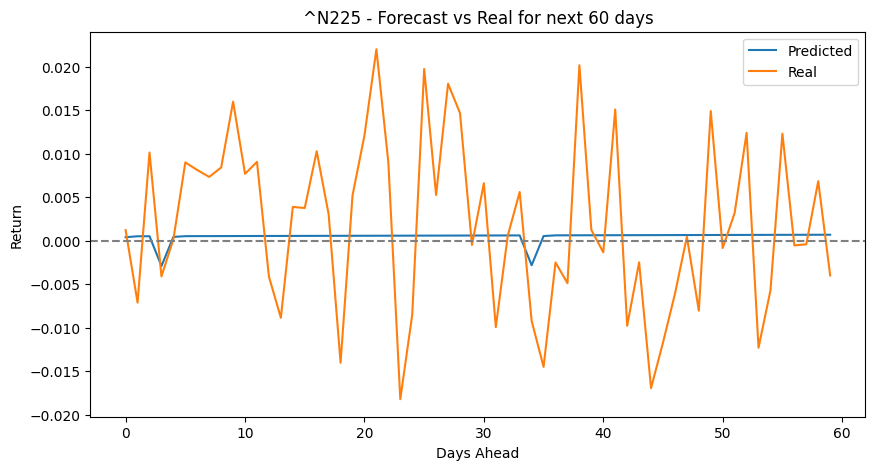

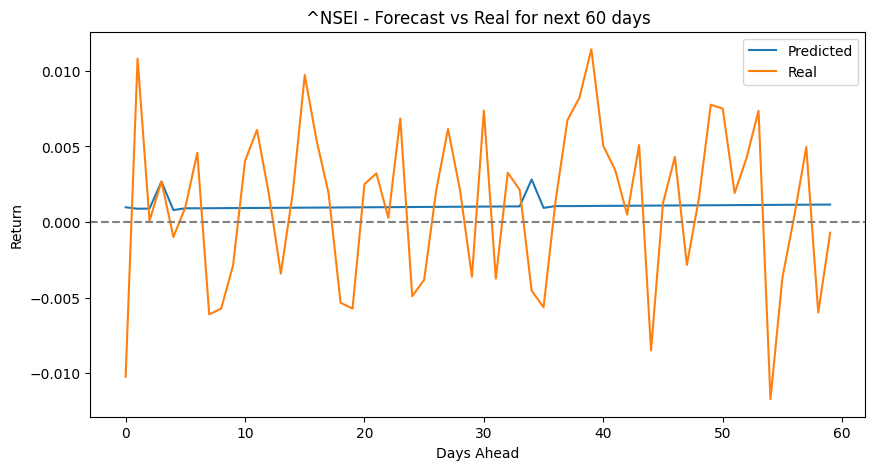

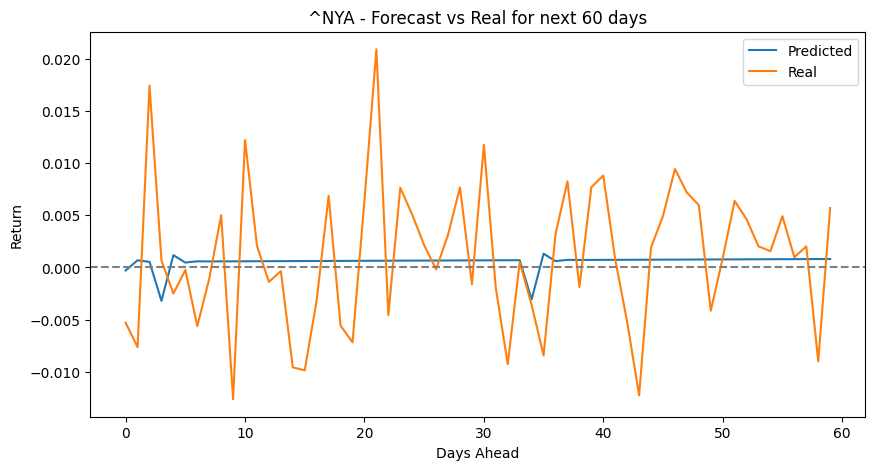

=== Forecast Metrics with Sign Match ===
       ticker       MAE  mean_pred  mean_real_abs  sign_match_%
0   000001.SS  0.006317   0.000324       0.006220     43.333333
1        CL=F  0.017944   0.000520       0.018010     56.666667
2        GC=F  0.005279   0.000280       0.005263     48.333333
3      ^BSESN  0.004426   0.001088       0.004577     60.000000
4        ^DJI  0.005219   0.000579       0.005128     56.666667
5       ^FTSE  0.004888   0.000368       0.004991     53.333333
6       ^GSPC  0.005603   0.000613       0.005524     55.000000
7       ^N100  0.005797   0.000631       0.005883     56.666667
8       ^N225  0.008012   0.000457       0.008168     60.000000
9       ^NSEI  0.004236   0.001079       0.004487     66.666667
10       ^NYA  0.005406   0.000560       0.005510     58.333333


In [ ]:
################################ This predicts into the future with anomaly feature
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

graph = 1
forecast_days = 60


def compute_anomaly_flags():

    return {}

anomaly_map = compute_anomaly_flags()


script_dir = os.getcwd()
file_path = os.path.join(script_dir, "output_folder")
files = glob.glob(os.path.join(file_path, "*_cleaned_2020_onward.csv"))

results_forecast = []

for f in files:
    ticker = os.path.basename(f).split("_cleaned")[0]

    df = pd.read_csv(f, parse_dates=["Date"]).set_index("Date")
    df.index = pd.to_datetime(df.index).tz_localize(None)

    if "real_close" not in df.columns:
        continue

  
    df["Return"] = df["real_close"].pct_change().fillna(0)


    if ticker in anomaly_map:
        ser = anomaly_map[ticker].reindex(df.index).fillna(0)
    else:
        ser = pd.Series(0, index=df.index)

    df["IsAnomaly"] = ser.astype(int)
    df["IsAnomaly_Regression"], reg_anomaly_dates = detect_regression_anomalies(df)

 
    X = pd.DataFrame(index=df.index)
    X["DayOfYear"] = df.index.dayofyear
    X["IsMonthStart"] = df.index.is_month_start.astype(int)
    X["IsJanuary"] = (df.index.month == 1).astype(int)
    X["Return_prev"] = df["Return"].shift(1).fillna(0)
    X["IsAnomaly"] = df["IsAnomaly"]
    X["IsAnomaly_Regression"]= df["IsAnomaly_Regression"]

    y = df["Return"]


    lr = LinearRegression()
    lr.fit(X, y)

    last_date = df.index[-1]
    prev_return = df["Return"].iloc[-1] ################################# use this to take into account calculated previous day
    # prev_return = 0
    predicted_returns = []

    for i in range(forecast_days):
        day_index = last_date + pd.Timedelta(days=i+1)

        X_next = pd.DataFrame({
            "DayOfYear": [day_index.dayofyear],
            "IsMonthStart": [int(day_index.is_month_start)],
            "IsJanuary": [int(day_index.month == 1)],
            "Return_prev": [prev_return],
            "IsAnomaly": [0],
            "IsAnomaly_Regression": [0]  
        })

        pred_return = lr.predict(X_next)[0]
        predicted_returns.append(pred_return)
        prev_return = pred_return


    real_future_returns = df["Return"].iloc[-forecast_days:].values
    if len(real_future_returns) < forecast_days:
        real_future_returns = np.pad(
            real_future_returns,
            (forecast_days - len(real_future_returns), 0),
            'constant', constant_values=np.nan
        )


    if graph == 1:
        plt.figure(figsize=(10,5))
        plt.plot(range(forecast_days), predicted_returns, label="Predicted")
        plt.plot(range(forecast_days), real_future_returns, label="Real")
        plt.title(f"{ticker} - Forecast vs Real for next {forecast_days} days")
        plt.xlabel("Days Ahead")
        plt.ylabel("Return")
        plt.axhline(y=0, color='gray', linestyle='--')
        plt.legend()
        plt.show()

  
    predicted_returns_arr = np.array(predicted_returns)
    valid_idx = ~np.isnan(real_future_returns)
    mae = np.mean(np.abs(predicted_returns_arr[valid_idx] - real_future_returns[valid_idx]))
    sign_match_pct = 100 * np.sum(np.sign(predicted_returns_arr[valid_idx]) == np.sign(real_future_returns[valid_idx])) / np.sum(valid_idx)

    results_forecast.append({
        "ticker": ticker,
        "MAE": mae,
        "mean_pred": np.mean(predicted_returns_arr),
        "mean_real_abs": np.mean(np.abs(real_future_returns[valid_idx])),
        "sign_match_%": sign_match_pct
    })


forecast_table = pd.DataFrame(results_forecast)
print("=== Forecast Metrics with Sign Match ===")
print(forecast_table)


In [ ]:
# Missing values see if there is any missing values still


import os, glob
import numpy as np
import pandas as pd

# CLEAN_DIR = "/home/ug/orlovsd2/csc1171/data/clean/SP500_ETF_FX_Crypto_Daily"
# files = glob.glob(f"{CLEAN_DIR}/*_cleaned_2008_2020.csv")

def load_clean_csv(path):
    try:
        df = pd.read_csv(path, parse_dates=["Date"]); df = df.set_index("Date")
    except ValueError:
        df = pd.read_csv(path, index_col=0, parse_dates=[0])
 
    df.index = pd.to_datetime(df.index).tz_localize(None)
    return df

per_file_rows = []
per_file_missing = []     
per_file_anyrow = []   
key_cols = ["real_close", "close", "adj_close", "open", "high", "low", "volume", "Value_USD", "CPI_USD"]

for path in files:
    df = load_clean_csv(path)
    ticker = os.path.basename(path).replace("_cleaned_2008_2020.csv", "")

    n = len(df)
    per_file_rows.append({"ticker": ticker, "n_rows": n})

    cols_here = [c for c in key_cols if c in df.columns]
    miss_counts = df[cols_here].isna().sum().to_dict()

 
    for c in cols_here:
        n_miss = int(miss_counts[c])
        pct = (n_miss / n * 100.0) if n > 0 else np.nan
        per_file_missing.append({
            "ticker": ticker, "column": c,
            "n_missing": n_miss, "pct_missing": pct
        })


    any_na_count = int(df.isna().any(axis=1).sum())
    any_na_pct = (any_na_count / n * 100.0) if n > 0 else np.nan
    per_file_anyrow.append({
        "ticker": ticker,
        "rows_with_any_na": any_na_count,
        "pct_rows_with_any_na": any_na_pct
    })


rows_tbl   = pd.DataFrame(per_file_rows).sort_values("ticker").reset_index(drop=True)
missing_tbl= pd.DataFrame(per_file_missing).sort_values(["ticker","column"]).reset_index(drop=True)
anyrow_tbl = pd.DataFrame(per_file_anyrow).sort_values("ticker").reset_index(drop=True)

print("=== Rows per file ===")
print(rows_tbl.head(10))
print(f"... total files: {len(rows_tbl)}")

print("\n=== Missingness by file & column (first 20 rows) ===")
print(missing_tbl.head(20))

print("\n=== Rows containing ANY NaN per file (top 20) ===")
print(anyrow_tbl.head(20))


wide = (missing_tbl
        .pivot(index="ticker", columns="column", values="pct_missing")
        .fillna(0.0)
        .reset_index())

print("\n=== % missing by ticker (wide table, first 10) ===")
print(wide.head(10))

if "real_close" in missing_tbl["column"].unique():
    miss_real = (missing_tbl[missing_tbl["column"]=="real_close"]
                 .sort_values("pct_missing", ascending=False)
                 .reset_index(drop=True))
    print("\n=== Tickers with most missing in real_close ===")
    print(miss_real.head(20))


OUT_DIR = os.path.join(CLEAN_DIR, "_missingness_checks")
os.makedirs(OUT_DIR, exist_ok=True)
rows_tbl.to_csv(os.path.join(OUT_DIR, "rows_per_file.csv"), index=False)
missing_tbl.to_csv(os.path.join(OUT_DIR, "missing_by_file_and_column.csv"), index=False)
anyrow_tbl.to_csv(os.path.join(OUT_DIR, "rows_with_any_na.csv"), index=False)
wide.to_csv(os.path.join(OUT_DIR, "pct_missing_wide.csv"), index=False)

print(f"\nSaved summaries to: {OUT_DIR}")


=== Rows per file ===
                              ticker  n_rows
0  000001.SS_cleaned_2020_onward.csv     866
1       CL=F_cleaned_2020_onward.csv     899
2       GC=F_cleaned_2020_onward.csv     899
3     ^BSESN_cleaned_2020_onward.csv     884
4       ^DJI_cleaned_2020_onward.csv     899
5      ^FTSE_cleaned_2020_onward.csv     900
6      ^GSPC_cleaned_2020_onward.csv     899
7      ^N100_cleaned_2020_onward.csv     919
8      ^N225_cleaned_2020_onward.csv     872
9      ^NSEI_cleaned_2020_onward.csv     886
... total files: 11

=== Missingness by file & column (first 20 rows) ===
                               ticker      column  n_missing  pct_missing
0   000001.SS_cleaned_2020_onward.csv     CPI_USD          0          0.0
1   000001.SS_cleaned_2020_onward.csv   Value_USD          0          0.0
2   000001.SS_cleaned_2020_onward.csv   adj_close          0          0.0
3   000001.SS_cleaned_2020_onward.csv       close          0          0.0
4   000001.SS_cleaned_2020_onward.csv  